In [1]:
import numpy as np
import tensorflow as tf

corpus_raw = 'He is the king . The king is royal . She is the royal queen .'

/usr/local/lib/python3.5/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
corpus_raw = corpus_raw.lower()

In [3]:
words = [word for word in corpus_raw.split() if word != '.']

words = set(words)

word2int = {}
int2word = {}

vocab_size = len(words)

for i, word in enumerate(words):
    word2int[word] = i
    int2word[i] = word

In [4]:
print(word2int['queen'])

5


In [6]:
raw_sentences = corpus_raw.split('.')
sentences = [sent.split() for sent in raw_sentences]
print(sentences)

[['he', 'is', 'the', 'king'], ['the', 'king', 'is', 'royal'], ['she', 'is', 'the', 'royal', 'queen'], []]


In [7]:
data = []

WINDOW_SIZE = 2

for sent in sentences:
    for idx, word in enumerate(sent):
        for nb_word in sent[max(idx - WINDOW_SIZE, 0) : min(idx + WINDOW_SIZE, len(sent)) + 1]:
            if nb_word != word:
                data.append([word, nb_word])

In [8]:
print(data)

[['he', 'is'], ['he', 'the'], ['is', 'he'], ['is', 'the'], ['is', 'king'], ['the', 'he'], ['the', 'is'], ['the', 'king'], ['king', 'is'], ['king', 'the'], ['the', 'king'], ['the', 'is'], ['king', 'the'], ['king', 'is'], ['king', 'royal'], ['is', 'the'], ['is', 'king'], ['is', 'royal'], ['royal', 'king'], ['royal', 'is'], ['she', 'is'], ['she', 'the'], ['is', 'she'], ['is', 'the'], ['is', 'royal'], ['the', 'she'], ['the', 'is'], ['the', 'royal'], ['the', 'queen'], ['royal', 'is'], ['royal', 'the'], ['royal', 'queen'], ['queen', 'the'], ['queen', 'royal']]


In [10]:
def to_one_hot(data_point_index, vocab_size):
    temp = np.zeros(vocab_size)
    temp[data_point_index] = 1
    return temp

x_train = []
y_train = []

for data_word in data:
    x_train.append(to_one_hot(word2int[ data_word[0] ], vocab_size))
    y_train.append(to_one_hot(word2int[ data_word[1] ], vocab_size))
    
x_train = np.asarray(x_train)
y_train = np.asarray(y_train)

In [12]:
print(x_train)
print(x_train.shape, y_train.shape)

[[1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1. 0.]]
(34, 7) (34, 7)


In [13]:
x = tf.placeholder(tf.float32, shape=(None, vocab_size))
y_label = tf.placeholder(tf.float32, shape=(None, vocab_size))

In [15]:
EMBEDDING_DIM = 5

W1 = tf.Variable(tf.random_normal([vocab_size, EMBEDDING_DIM]))
b1 = tf.Variable(tf.random_normal([EMBEDDING_DIM]))

hidden_representation = tf.add(tf.matmul(x, W1), b1)

In [17]:
W2 = tf.Variable(tf.random_normal([EMBEDDING_DIM, vocab_size]))
b2 = tf.Variable(tf.random_normal([vocab_size]))

prediction = tf.nn.softmax(tf.add(tf.matmul(hidden_representation, W2), b2))

In [19]:
sess = tf.Session()

init = tf.global_variables_initializer()
sess.run(init)

cross_entropy_loss = tf.reduce_mean(-tf.reduce_sum(y_label * tf.log(prediction), reduction_indices=[1]))

train_step = tf.train.GradientDescentOptimizer(0.1).minimize(cross_entropy_loss)

n_iters = 10000

for _ in range(n_iters):
    sess.run(train_step, feed_dict={x: x_train, y_label: y_train})
    print('loss is: ', sess.run(cross_entropy_loss, feed_dict={x: x_train, y_label: y_train}))

loss is:  2.939866
loss is:  2.7945168
loss is:  2.6952238
loss is:  2.6210709
loss is:  2.561339
loss is:  2.510379
loss is:  2.4651344
loss is:  2.4238827
loss is:  2.3856084
loss is:  2.3496873
loss is:  2.3157196
loss is:  2.283442
loss is:  2.2526722
loss is:  2.2232807
loss is:  2.1951702
loss is:  2.1682653
loss is:  2.1425052
loss is:  2.1178384
loss is:  2.09422
loss is:  2.0716085
loss is:  2.049967
loss is:  2.0292604
loss is:  2.0094543
loss is:  1.9905149
loss is:  1.9724112
loss is:  1.9551109
loss is:  1.9385827
loss is:  1.9227957
loss is:  1.9077197
loss is:  1.893324
loss is:  1.8795794
loss is:  1.8664559
loss is:  1.8539251
loss is:  1.8419586
loss is:  1.8305292
loss is:  1.81961
loss is:  1.8091749
loss is:  1.799199
loss is:  1.7896577
loss is:  1.780528
loss is:  1.7717878
loss is:  1.7634153
loss is:  1.7553906
loss is:  1.7476944
loss is:  1.740308
loss is:  1.7332146
loss is:  1.7263975
loss is:  1.7198412
loss is:  1.7135313
loss is:  1.7074537
loss is:  1.7

In [20]:
print(sess.run(W1))
print('----------')
print(sess.run(b1))
print('----------')

[[-0.25808463  1.8718634   0.5161111   0.1261208   0.9581067 ]
 [ 2.4179282  -0.2982689  -1.4851178   0.4378175   0.46564102]
 [-0.6784988  -0.36388433 -1.2492836  -1.7276511  -0.25882465]
 [-0.14233597  1.7313312   0.74131566  0.08981071  0.83118737]
 [ 0.16306406  2.3716252   0.5556961   0.47381383 -1.5208275 ]
 [ 0.25734964  0.67181134 -1.6950988   2.2359064  -0.25459883]
 [ 0.02869756 -0.4721033   1.5388622   0.00571154  0.4422796 ]]
----------
[ 0.44586217  1.1698427   1.058067   -0.7552061   0.36716002]
----------


In [21]:
vectors = sess.run(W1 + b1)

In [22]:
print(vectors[ word2int['queen'] ])

[ 0.7032118  1.8416541 -0.6370318  1.4807003  0.1125612]


In [23]:
def euclidean_dist(vec1, vec2):
    return np.sqrt(np.sum((vec1-vec2)**2))

def find_closest(word_index, vectors):
    min_dist = 10000 # to act like positive infinity
    min_index = -1
    query_vector = vectors[word_index]
    for index, vector in enumerate(vectors):
        if euclidean_dist(vector, query_vector) < min_dist and not np.array_equal(vector, query_vector):
            min_dist = euclidean_dist(vector, query_vector)
            min_index = index
    return min_index

In [24]:
print(int2word[find_closest(word2int['king'], vectors)])
print(int2word[find_closest(word2int['queen'], vectors)])
print(int2word[find_closest(word2int['royal'], vectors)])

she
is
she


In [25]:
from sklearn.manifold import TSNE

model = TSNE(n_components=2, random_state=0)
np.set_printoptions(suppress=True)
vectors = model.fit_transform(vectors)

In [27]:
from sklearn import preprocessing

normalizer = preprocessing.Normalizer()
vectors =  normalizer.fit_transform(vectors, 'l2')

he -0.7028995
is -0.6847747
the -0.99195087
she -0.99901664
king -0.98721266
queen -0.94380707
royal -0.8870627


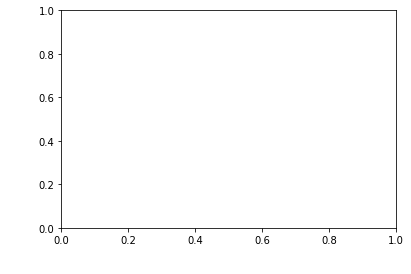

In [30]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
for word in words:
    print(word, vectors[word2int[word]][1])
    ax.annotate(word, (vectors[word2int[word]][0],vectors[word2int[word]][1] ))
plt.show()

In [ ]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-

import six
import os

if six.PY3:
    from urllib.request import urlopen
else:
    from urllib2 import urlopen

from gensim.models.word2vec import Text8Corpus

URL = ("http://mattmahoney.net/dc/text8.zip")
ARCHIVE_NAME = "text8.zip"

def download_text8(target_dir=None):
    """
    Download the text8.zip data and stored it in target_dir.
    (http://mattmahoney.net/dc/text8.zip)
    if the target_dir is not speficed, then create a folder
    named 'GENSIM_DATA' in the user home folder
    """

    if target_dir is None:
        target_dir = os.path.join("~", "GENSIM_DATA")

    target_dir = os.path.expanduser(target_dir)
    archive_path = os.path.join(target_dir, ARCHIVE_NAME)

    if os.path.exists(archive_path):
        # Download is not complete as the zip file is removed after download.
        os.remove(archive_path)
    
    opener = urlopen(URL)
    with open(archive_path, 'wb') as f:
        f.write(opener.read())

    return archive_path

if __name__ == "__main__":
    file_path = download_text8("~")